# Домашнее задание «Корреляция и корреляционный анализ»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<div class="alert alert-success">
<h3>1. Датасет Mortality and Water Hardness</h3>
    https://www.kaggle.com/ukveteran/mortality-and-water-hardness
</div>

В этом датасете содержатся данные по средней годовой смертности на 100.000 населения <br>
и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. <br>
Города дополнительно поделены на северные и южные.

In [3]:
df = pd.read_csv('water.csv', usecols=['location','town','mortality','hardness'])

In [4]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
location     61 non-null object
town         61 non-null object
mortality    61 non-null int64
hardness     61 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


<div class="alert alert-success">
<h3> 2. Есть ли связь между жёсткостью воды и средней годовой смертностью? </h3>
</div>

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

### Точечный график 'hardness'  / 'mortality'

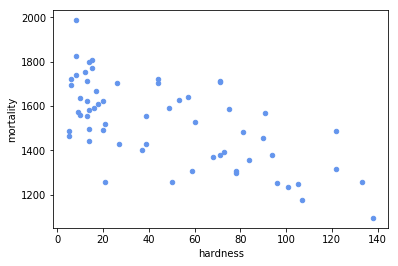

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality', c='cornflowerblue')

### Коэффициент корреляции Пирсона

In [7]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


### Коэффициент корреляции Спирмена

In [8]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


### Модель линейной регрессии

In [9]:
X = df[['hardness']]
y = df['mortality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print('\ny = a * x + b \n')
print(f'a = {model.coef_[0]}, b = {model.intercept_}')


y = a * x + b 

a = -3.282818453352771, b = 1683.9212680875548


In [14]:
y_pred = model.predict(X_test)

### Коэффициент детерминации

In [15]:
print(f'R2 = {model.score(X_test, y_test)}')

R2 = 0.5099679408034544


### График остатков

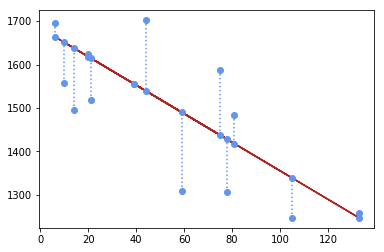

In [16]:
plt.plot(X_test, y_pred, c='firebrick')

for xt, yt, yp in zip(X_test['hardness'], y_test, y_pred):
    plt.plot([xt, xt], [yt, yp], c='cornflowerblue', linestyle=':', marker='o')

<div class="alert alert-success">
<h3> 3. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? </h3>
</div>

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [17]:
def show_stat_info(df, x, y):
    print(f'Точечный график {x} / {y}:')
    df.plot(kind='scatter', x=x, y=y, c='cornflowerblue')
    plt.show()
    
    print(f'Коэффициент корреляции Пирсона:')
    print(df[[x, y]].corr())
    
    print(f'\nКоэффициент корреляции Спирмена:')
    print(df[[x, y]].corr(method='spearman'))
    
    print(f'\nМодель линейной регрессии:')
    X_ = df[[x]]
    y_ = df[y]
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)
    print(f'Всего наблюдений в выборке: {y_.count()}')
    print(f'Размер тренировочной выборки: {y_train.count()}')
    print(f'Размер тестовой выборки: {y_test.count()}')
    model = LinearRegression()
    model.fit(X_train, y_train)
    print('y = a * x + b')
    print(f'a = {model.coef_[0]}, b = {model.intercept_}')
    y_pred = model.predict(X_test)
    
    print(f'\nКоэффициент детерминации:\nR2 = {model.score(X_test, y_test)}')
  
    print(f'\nГрафик остатков:')
    plt.plot(X_test, y_pred, c='firebrick')
    for xt, yt, yp in zip(X_test[x], y_test, y_pred):
        plt.plot([xt, xt], [yt, yp], c='cornflowerblue', linestyle=':', marker='o')
    plt.show()

### Южные города

Точечный график hardness / mortality:


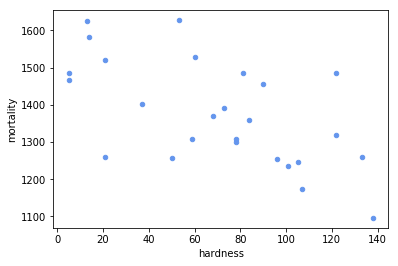

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000

Модель линейной регрессии:
Всего наблюдений в выборке: 26
Размер тренировочной выборки: 20
Размер тестовой выборки: 6
y = a * x + b
a = -3.0746612681876426, b = 1595.4337548999538

Коэффициент детерминации:
R2 = -1.9300174406554644

График остатков:


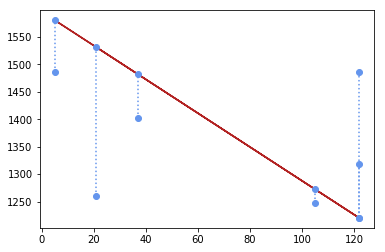

In [18]:
show_stat_info(df.query("location == 'South'"), 'hardness', 'mortality')

### Северные города

Точечный график hardness / mortality:


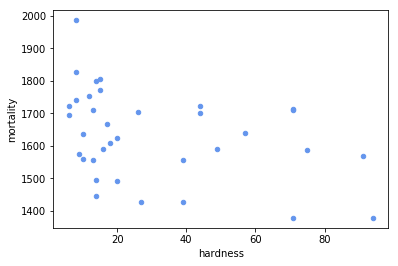

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000

Модель линейной регрессии:
Всего наблюдений в выборке: 35
Размер тренировочной выборки: 28
Размер тестовой выборки: 7
y = a * x + b
a = -2.2503888831276564, b = 1694.905301402942

Коэффициент детерминации:
R2 = -0.18101539518829401

График остатков:


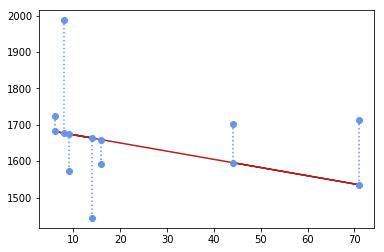

In [19]:
show_stat_info(df.query("location == 'North'"), 'hardness', 'mortality')

Всего по датасету обычный коэффициент корреляции между жёсткостью воды и средней годовой смертностью составил -0.65, коэффициент детерминации для тестовой выборки в модели линейной регрессии составил 0.51.<br>
<br>
По южным городам коэффициент корреляции составил -0.60, а по северным уже гораздо ниже -0.37.
<br>
Отрицательные коэффициенты детерминации для тестовых выборок возникли из-за того, что данных очень мало, размеры тренировочных выборок: 20 по Югу и 28 по Северу. Специфика конкретного разделения.
<br><br>
Попробуем убрать для train_test_split() фиксированный параметр random_state и посмотрим на размах возможных значений коэффициента детерминации:

In [20]:
def get_r2_range(df, x, y, N=420):
    X_, y_ = df[[x]], df[y]
    
    def get_random_r2(X_, y_):
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        return model.score(X_test, y_test)
    
    R2_list = [get_random_r2(X_, y_) for _ in range(N)]
    return min(R2_list), max(R2_list), np.array(R2_list)

### для южных городов:

In [21]:
r2_south = get_r2_range(df.query("location == 'South'"), 'hardness', 'mortality')

In [22]:
print(f'R2 min = {r2_south[0]:.2f}, \nR2 median = {np.median(r2_south[2]):.2f}, \nR2 max = {r2_south[1]:.2f}')

R2 min = -10.90, 
R2 median = 0.21, 
R2 max = 0.79


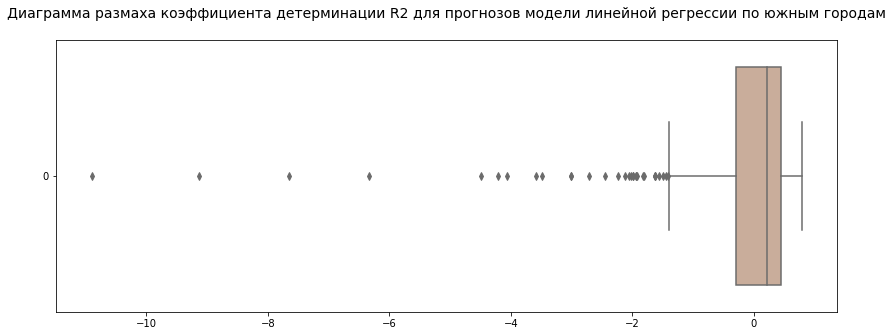

In [23]:
rcParams['figure.figsize'] = 14,5
plt.title(f"Диаграмма размаха коэффициента детерминации R2 для прогнозов модели линейной регрессии по южным городам\n",fontsize=14)
sns.boxplot(data=r2_south[2], orient='h', palette='pink')

### для северных городов:

In [24]:
r2_north = get_r2_range(df.query("location == 'North'"), 'hardness', 'mortality')

In [25]:
print(f'R2 min = {r2_north[0]:.2f}, \nR2 median = {np.median(r2_north[2]):.2f}, \nR2 max = {r2_north[1]:.2f}')

R2 min = -4.39, 
R2 median = -0.10, 
R2 max = 0.41


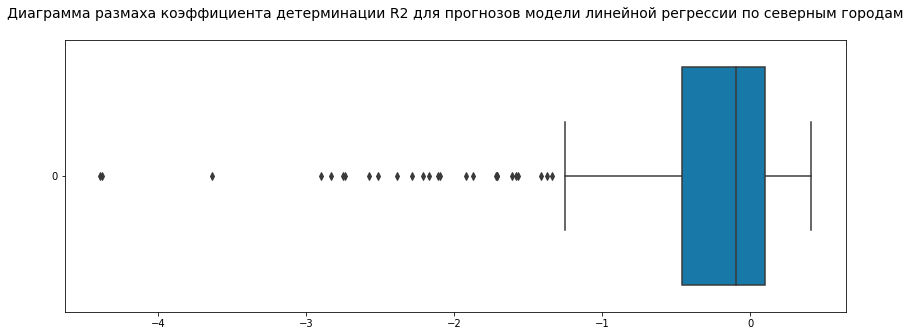

In [26]:
rcParams['figure.figsize'] = 14,5
plt.title(f"Диаграмма размаха коэффициента детерминации R2 для прогнозов модели линейной регрессии по северным городам\n",fontsize=14)
sns.boxplot(data=r2_north[2], orient='h', palette='winter')

В среднем так себе прогнозы :)<br>
Ещё раз взглянем на все данные, только поделим север и юг цветами:

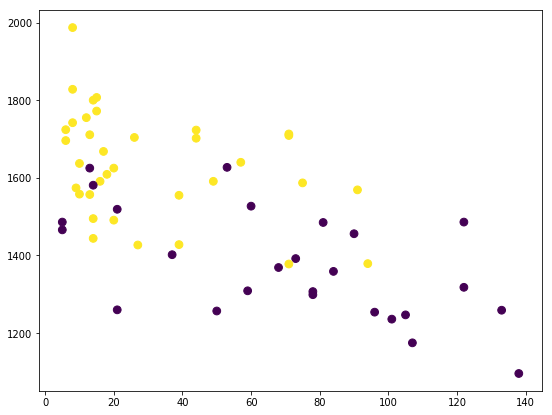

In [27]:
rcParams['figure.figsize'] = 9,7
plt.scatter(df['hardness'], df['mortality'], c=df['location']
            .apply(lambda x: 1 if x == 'North' else 0), s=60)

Возможно на юге чем жестче вода, тем её вообще реже употребляют в пищу, используют бутилированную.<br>
а на севере смертность заметно выше не по причине мягкой воды, а по сторонним факторам.